1. Library Imports


In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

2- Data Loading

In [49]:
data = pd.read_csv("/workspaces/Data-analysis-2/Naive_Bayes_Classifier/pima_indians_diabetes.csv")

3. Basic Data Exploration


In [50]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
print(data.shape)

(768, 9)


In [52]:
data_summary = data.describe().T

data_summary.style.background_gradient(cmap="Blues")


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [53]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [54]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Missing Values Analysis

In [55]:
print("Total Missing Values Numbers of columns;")
isnull = pd.DataFrame(data.isnull().sum())
isnull.style.background_gradient(cmap="ocean")

Total Missing Values Numbers of columns;


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


4. Outlier Detection and Removal


In [56]:
# Calculate Z-Score for each point in the dataset
z_scores = np.abs(stats.zscore(data))

# Identify outliers: any value with Z-Score greater than 3 or less than -3 is considered an outlier
data_cleaned_zscore = data[(z_scores < 3).all(axis=1)]

# Display the number of outliers removed
removed_outliers_zscore = data.shape[0] - data_cleaned_zscore.shape[0]
print(f"Removed {removed_outliers_zscore} outliers.")


Removed 80 outliers.


In [57]:
# Store the cleaned data after removing outliers into a new variable called df1
df1 = data_cleaned_zscore.copy()

# Display a few rows of the cleaned data to confirm
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [58]:
df1.shape

(688, 9)

1. Pie Chart for Outcome Distribution


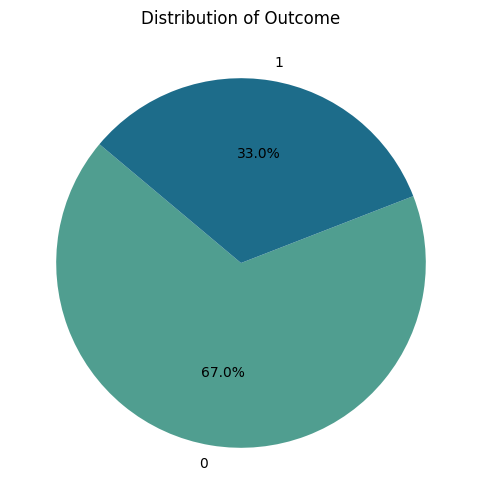

In [59]:
# Assuming 'target' is the 'Outcome' column from df1
target = df1['Outcome']

outcome_counts = target.value_counts()

palette = sns.color_palette("crest", len(outcome_counts))

plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, colors=palette, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Outcome')

# Display the plot
plt.show()


2. Box Plot for Each Feature by Outcome


/tmp/ipykernel_7390/1624082554.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=data[feature], palette='BuGn')
/tmp/ipykernel_7390/1624082554.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=data[feature], palette='BuGn')
/tmp/ipykernel_7390/1624082554.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=data[feature], palette='BuGn')
/tmp/ipykernel_7390/1624082554.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

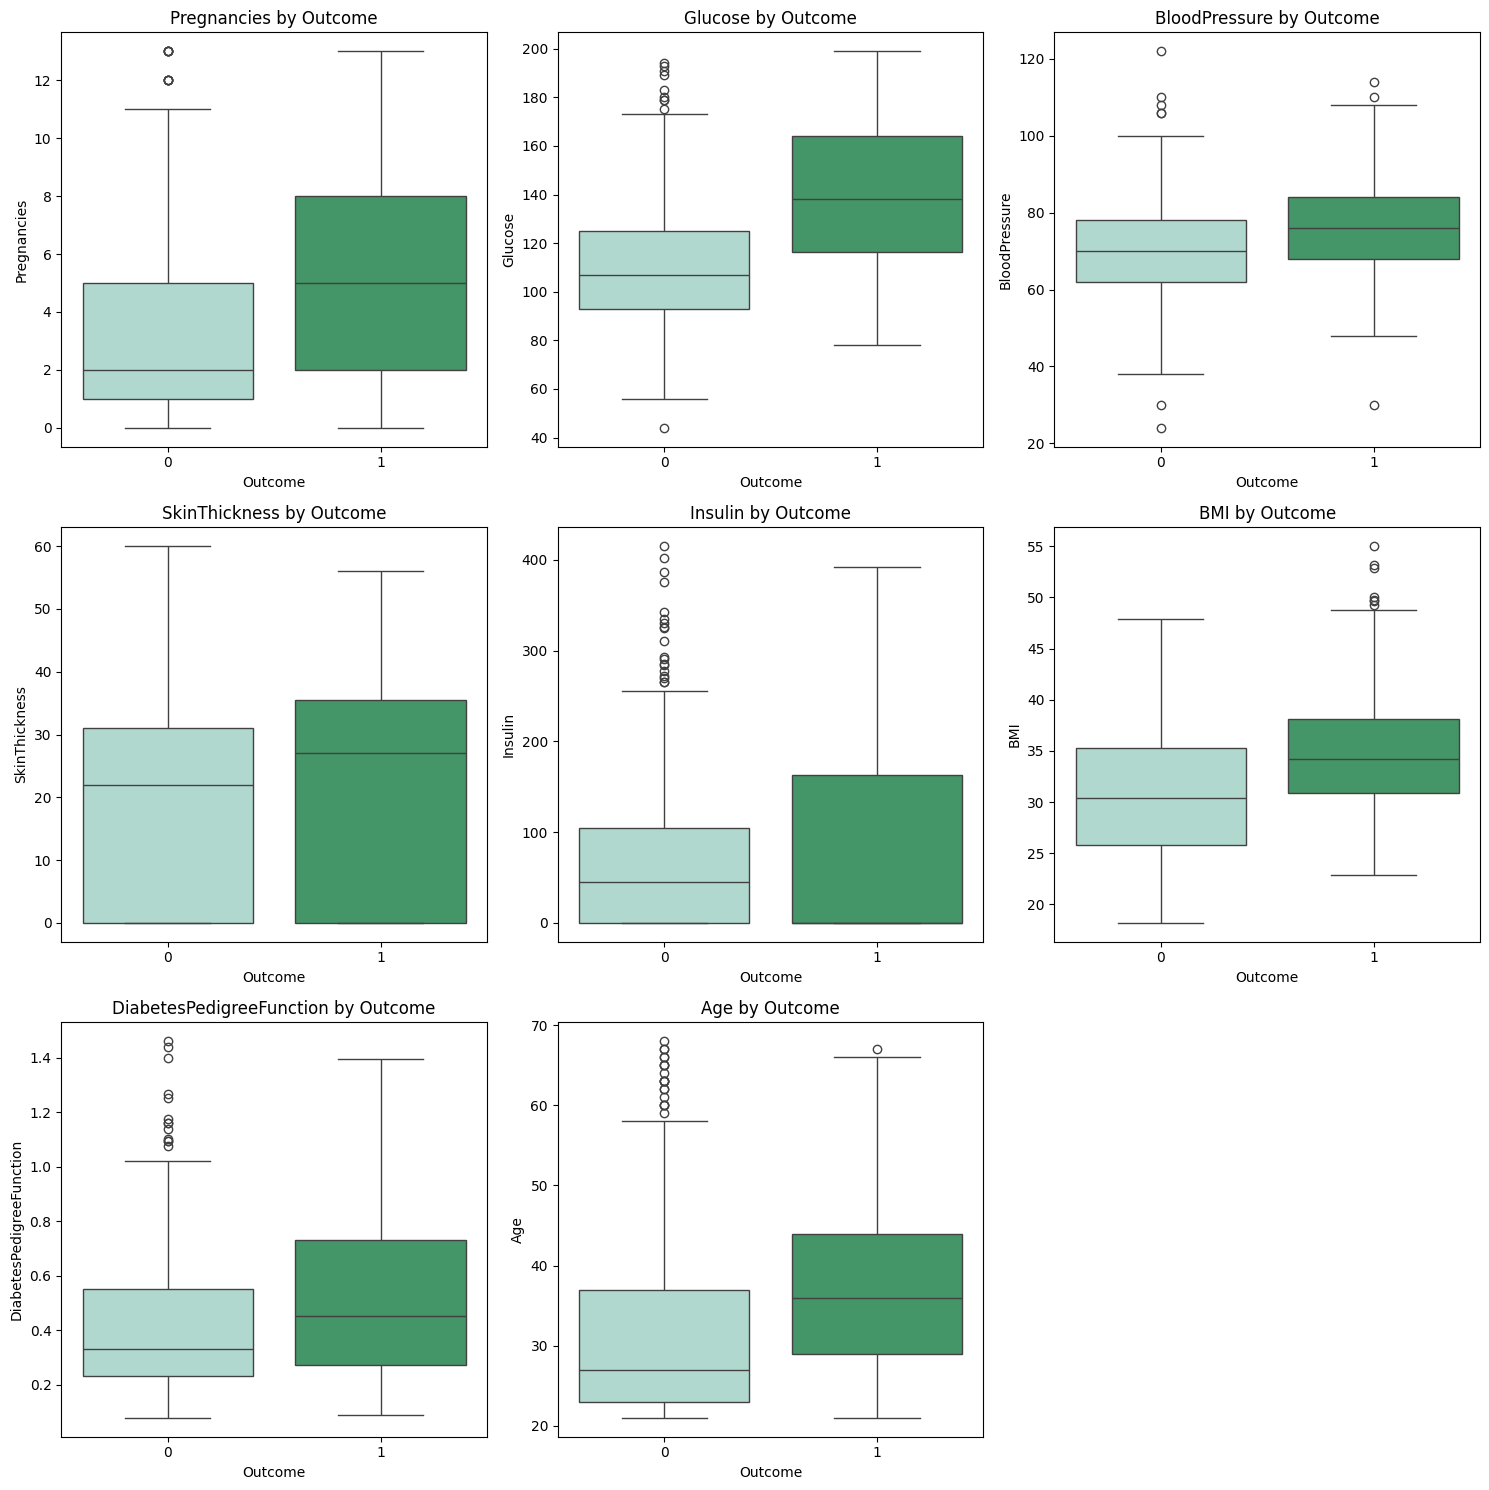

In [60]:
# Define 'features' as the columns in the dataset except the 'Outcome' column
features = df1.drop(columns='Outcome')

# Define 'target' as the 'Outcome' column
target = df1['Outcome']

# Box Plot Function (same as your code)
def plot_boxplots(data, target, target_name='Outcome'):
    num_features = data.shape[1]
    num_rows = (num_features + 2) // 3  # Determine number of rows for subplot grid
    
    plt.figure(figsize=(15, num_rows * 5))
    
    for i, feature in enumerate(data.columns):
        plt.subplot(num_rows, 3, i + 1)
        sns.boxplot(x=target, y=data[feature], palette='BuGn')
        plt.title(f'{feature} by {target_name}')
        plt.xlabel(target_name)
        plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

plot_boxplots(features, target)


4. Univariate Analysis (Bar Plot)




/tmp/ipykernel_7390/2185832762.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


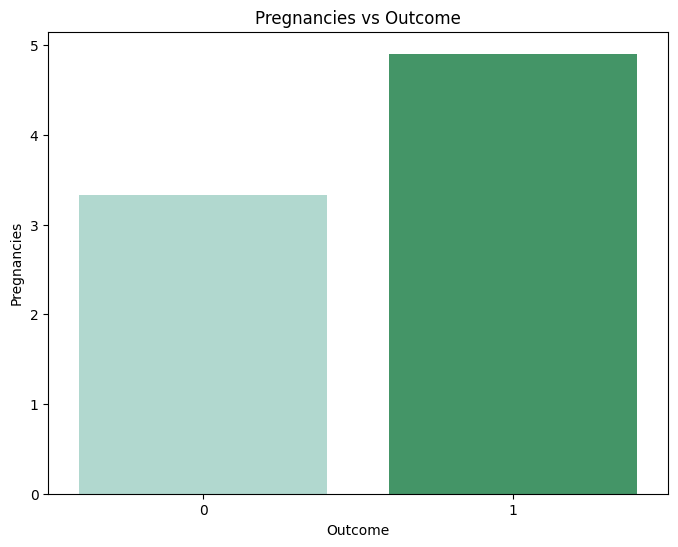

/tmp/ipykernel_7390/2185832762.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


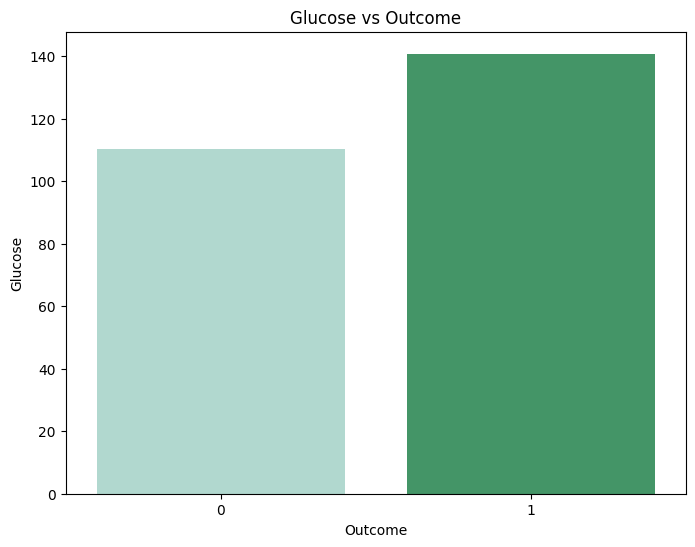

/tmp/ipykernel_7390/2185832762.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


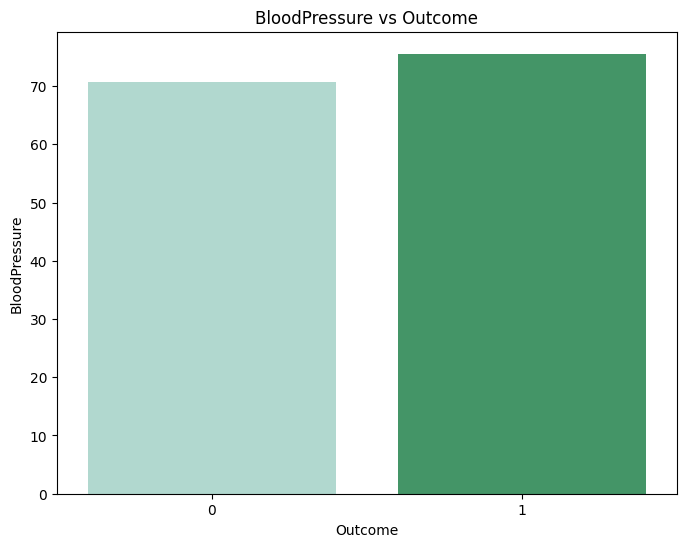

/tmp/ipykernel_7390/2185832762.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


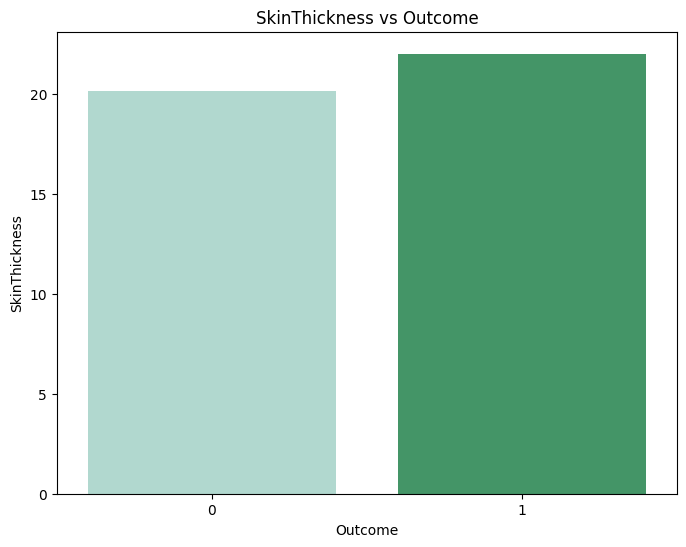

/tmp/ipykernel_7390/2185832762.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


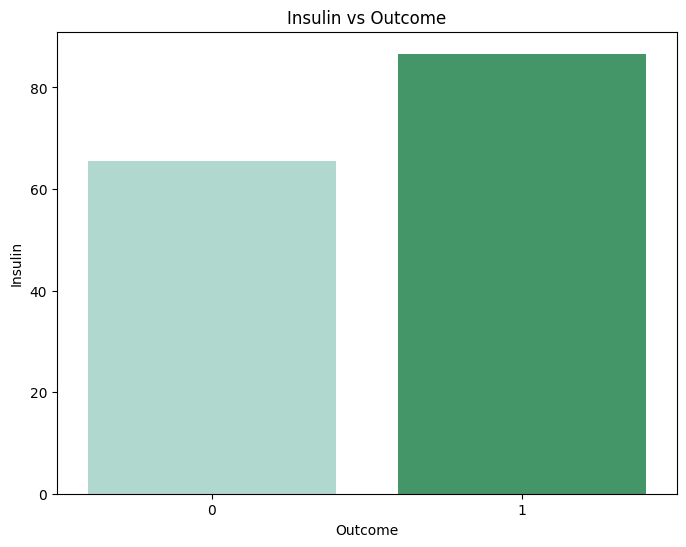

/tmp/ipykernel_7390/2185832762.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


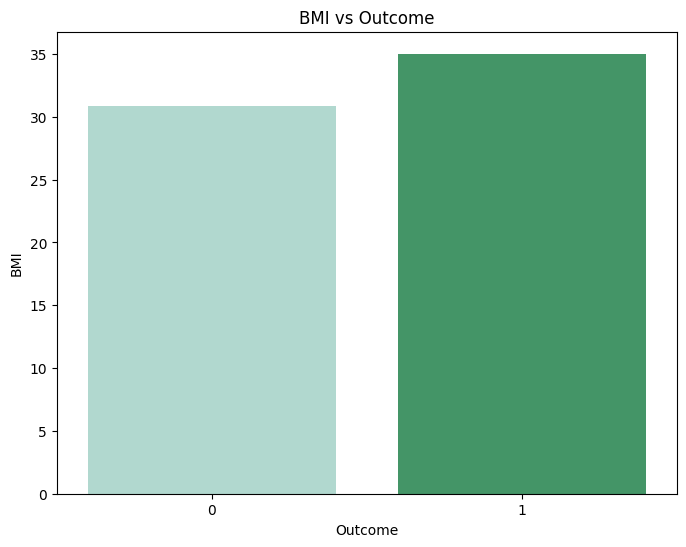

/tmp/ipykernel_7390/2185832762.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


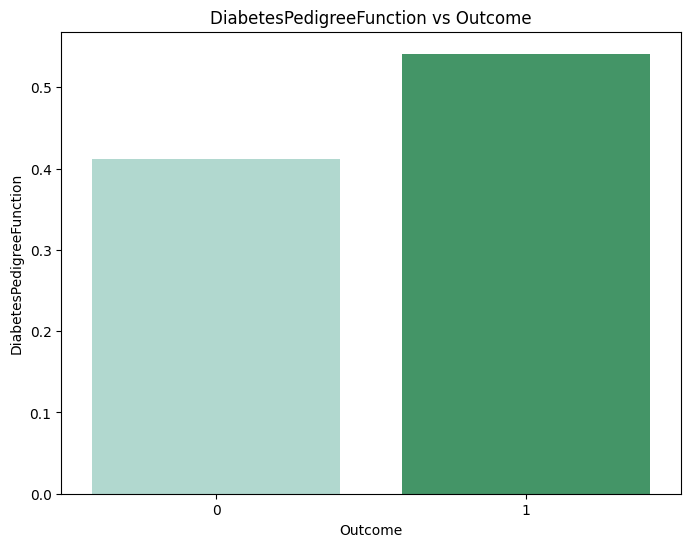

/tmp/ipykernel_7390/2185832762.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


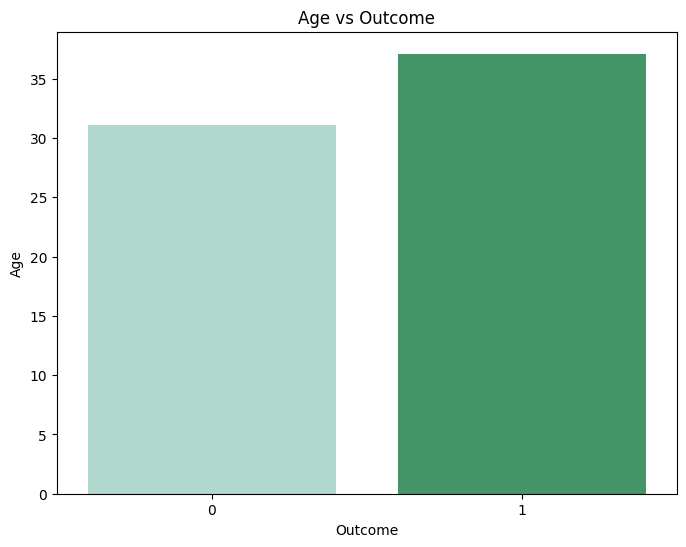

In [61]:
def plot_individual_barplots_with_labels(data, target, target_name='Outcome'):
    for feature in data.columns:
        plt.figure(figsize=(8, 6))  # Set the size of each plot to 8x6 inches
        
        # Create a DataFrame for plotting
        plot_data = pd.concat([data[feature], target], axis=1)
        plot_data.columns = [feature, target_name]
        
        # Calculate mean of feature values for each outcome class
        mean_values = plot_data.groupby(target_name)[feature].mean().reset_index()
        
        # Create the bar plot
        ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')
        plt.title(f'{feature} vs {target_name}')
        plt.xlabel(target_name)
        plt.ylabel(feature)
    
        plt.show()  # Display each plot individually

# Example usage
plot_individual_barplots_with_labels(features, target)


5. Bivariate Analysis (Scatter Plot for Insulin vs Pregnancies by Outcome)


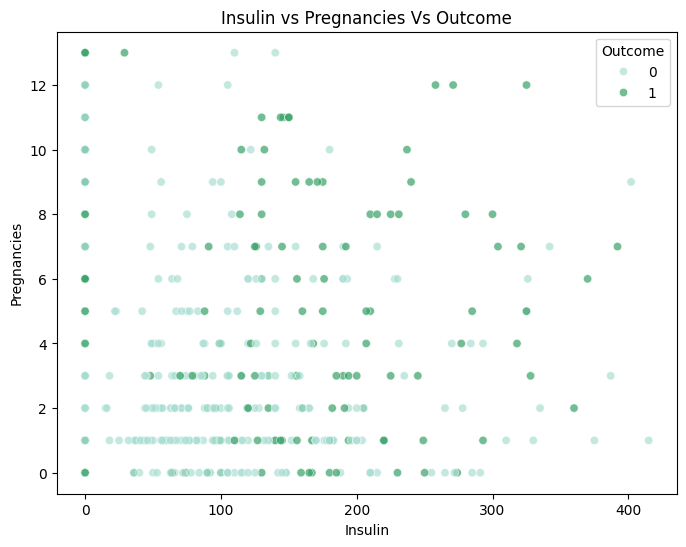

In [62]:
def plot_scatter_insulin_pregnancies(data, target, target_name='Outcome'):
    # Combine features and target variable into one DataFrame
    plot_data = pd.concat([data[['Insulin', 'Pregnancies']], target], axis=1)
    plot_data.columns = ['Insulin', 'Pregnancies', target_name]
    
    # Create a scatter plot with hue
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Insulin', y='Pregnancies', hue=target_name, data=plot_data, palette='BuGn', alpha=0.7)
    
    # Add plot details
    plt.title('Insulin vs Pregnancies Vs Outcome')
    plt.xlabel('Insulin')
    plt.ylabel('Pregnancies')
    plt.legend(title=target_name)
    
    plt.show()

# Example usage
plot_scatter_insulin_pregnancies(features, target)


6. Grouped Bar Plot for Insulin and Pregnancies by Outcome


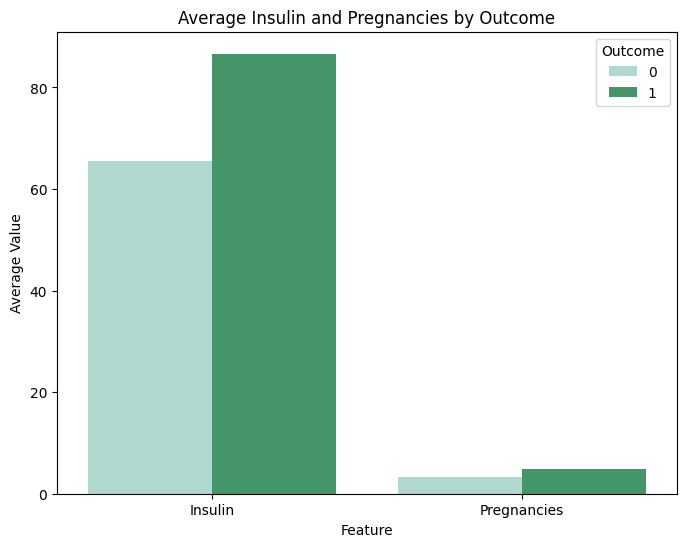

In [63]:
def plot_grouped_barplots(data, target, target_name='Outcome'):
    # Define a constant for the 'Average Value'
    AVERAGE_VALUE_LABEL = 'Average Value'
    
    # Combine features and target variable into one DataFrame
    plot_data = pd.concat([data[['Insulin', 'Pregnancies']], target], axis=1)
    plot_data.columns = ['Insulin', 'Pregnancies', target_name]
    
    # Aggregate data: mean values for each outcome class
    avg_values = plot_data.groupby(target_name).mean().reset_index()
    
    # Melt the DataFrame to long format for plotting
    avg_values_melted = avg_values.melt(id_vars=target_name, var_name='Feature', value_name=AVERAGE_VALUE_LABEL)
    
    # Create grouped bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Feature', y=AVERAGE_VALUE_LABEL, hue=target_name, data=avg_values_melted, palette='BuGn')
    
    # Add plot details
    plt.title('Average Insulin and Pregnancies by Outcome')
    plt.xlabel('Feature')
    plt.ylabel(AVERAGE_VALUE_LABEL)
    plt.legend(title=target_name)
    
    plt.show()

# Example usage
plot_grouped_barplots(features, target)
